<a href="https://colab.research.google.com/github/subhamdash/AutoEncoder/blob/master/Mnist_digit_simple_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.datasets import mnist

**Import all the libraries**

**UTILITY FUNCTION TO DISPLAY THE IMAGE**

In [0]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(test_x)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_x[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = min(min_epoch, len(history.epoch))
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: " + ' vs '.join([str(round(x, 3)) for x in losses]))
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")
    
    plt.xlim(0, min_epoch-1)
    plt.tight_layout()

**Import the mnist digit dataset and normalized it ** 

In [0]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0
train_x = train_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)
print(train_x.shape)
print(test_x.shape)

**In this section, we create an autoencoder architecture. The encoding part comprises of two layers with 128, and 64 nodes and a code layer with 32 nodes.**

In [0]:
input_size=784

## input layer
input_layer = Input(shape=(input_size,))

encode_layer1 = Dense(128, activation='relu')(input_layer)
encode_layer2 = Dense(64, activation='relu')(encode_layer1)

code_layer   = Dense(32, activation='sigmoid')(encode_layer2)

decode_layer1 = Dense(64, activation='relu')(code_layer)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)

## output layer
output_layer  = Dense(784,activation='sigmoid')(decode_layer2)




In [0]:
autoencoder = Model(input_layer, output_layer)
autoencoder.summary()

**Next, we will train the model with early stopping callback. or in normally (select any one both are same)**

In [0]:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_x,train_x, epochs=3)

In [0]:
autoencoder.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
autoencoder.fit(train_x, train_x, epochs=3, batch_size=2048, validation_data=(test_x, test_x), callbacks=[early_stopping])

**Lets plot the original and predicted image**

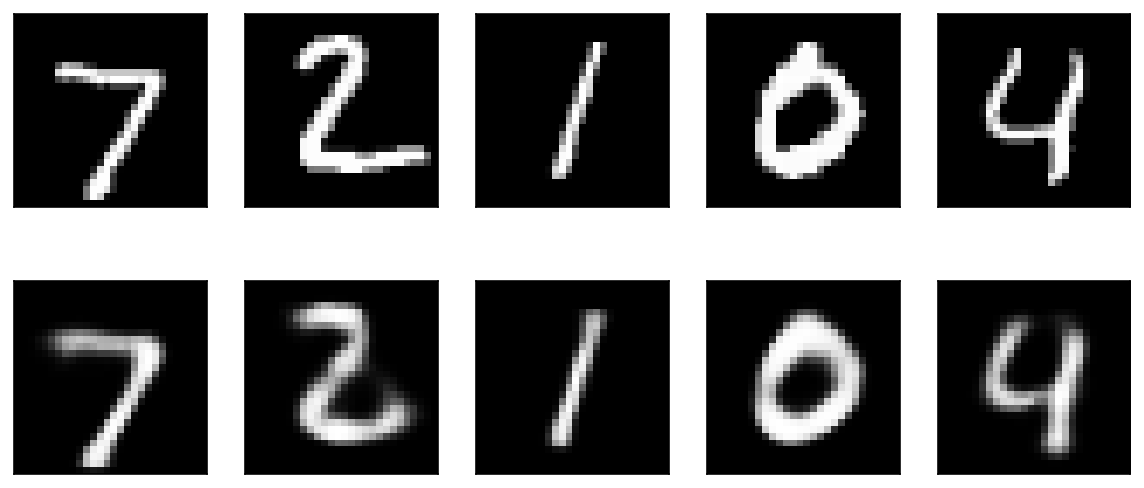

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.9406967e-08 0.0000000e+00 8.9406967e-08 ... 0.0000000e+00
  2.9802322e-08 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.9604645e-08 0.0000000e+00 ... 2.9802322e-08
  0.0000000e+00 5.9604645e-08]
 [2.9802322e-08 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [40]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))
preds = autoencoder.predict(test_x)
